# Imports

In [1]:
from src.sql_helpers import query_df
from matplotlib.ticker import MaxNLocator
import numpy as np
import matplotlib.pyplot as plt

Connection to SQL server successful!


/home/markus/Desktop/Data Scientist/3. SQL/2. Examinerande_Uppgift/src/sql_helpers.py:19: SAWarning: Unrecognized server version info '17.0.1000.7'.  Some SQL Server features may not function properly.
  with engine.connect():


# Task 1 - Amount of products per category
### Place all unique Categories in a list

In [2]:
# Production.ProductCategory
cat_query = """
SELECT ProductCategoryID
FROM Production.ProductCategory
"""

cat_df = query_df(cat_query)

productCategoryIDs = cat_df['ProductCategoryID'].unique()
productCategoryIDs.sort()
print(f"Category ID's: {productCategoryIDs}")

Category ID's: [1 2 3 4]


### Place all unique Subcategories in a list

In [3]:
# Production.ProductSubcategory
subcat_query = """
SELECT ProductSubcategoryID, ProductCategoryID
FROM Production.ProductSubcategory
"""
subcat_df = query_df(subcat_query)
productSubcategoryIDs = subcat_df['ProductSubcategoryID'].unique()
productSubcategoryIDs.sort()
print(f"Subcategory ID's: {productSubcategoryIDs}")

Subcategory ID's: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37]


### Place all unique productID's in a list

In [4]:
# Production.Product
prods_query = """
SELECT ProductID
FROM Production.Product
"""
prods_df = query_df(prods_query)
productIDs = prods_df['ProductID'].unique()
productIDs.sort()
print(f"Product ID's: {productIDs}")

Product ID's: [  1   2   3   4 316 317 318 319 320 321 322 323 324 325 326 327 328 329
 330 331 332 341 342 343 344 345 346 347 348 349 350 351 352 355 356 357
 358 359 360 361 362 363 364 365 366 367 368 369 370 371 372 373 374 375
 376 377 378 379 380 381 382 383 384 385 386 387 388 389 390 391 392 393
 394 395 396 397 398 399 400 401 402 403 404 405 406 407 408 409 410 411
 412 413 414 415 416 417 418 419 420 421 422 423 424 425 426 427 428 429
 430 431 432 433 434 435 436 437 438 439 440 441 442 443 444 445 446 447
 448 449 450 451 452 453 454 455 456 457 458 459 460 461 462 463 464 465
 466 467 468 469 470 471 472 473 474 475 476 477 478 479 480 481 482 483
 484 485 486 487 488 489 490 491 492 493 494 495 496 497 504 505 506 507
 508 509 510 511 512 513 514 515 516 517 518 519 520 521 522 523 524 525
 526 527 528 529 530 531 532 533 534 535 679 680 706 707 708 709 710 711
 712 713 714 715 716 717 718 719 720 721 722 723 724 725 726 727 728 729
 730 731 732 733 734 735 736 737 738 

### Place all products in a DataFrame

In [5]:
# Production.Product
product_query = """
SELECT ProductSubcategoryID
FROM Production.Product
"""

product_df = query_df(product_query)

### Check how many subcategories each category has

In [6]:
subcats_in_cat = {}

# Loops over all ProductCategoryID's and adds it as a key along with all ProductSubcategoryID's as a list for value that has that ProductCategoryID
for i in productCategoryIDs:
    temp_df = subcat_df.loc[subcat_df["ProductCategoryID"] == i]
    if i not in subcats_in_cat:
        subcats_in_cat[i] = [_ for _ in temp_df["ProductSubcategoryID"]]

print(subcats_in_cat)


{1: [1, 2, 3], 2: [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17], 3: [18, 19, 20, 21, 22, 23, 24, 25], 4: [26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37]}


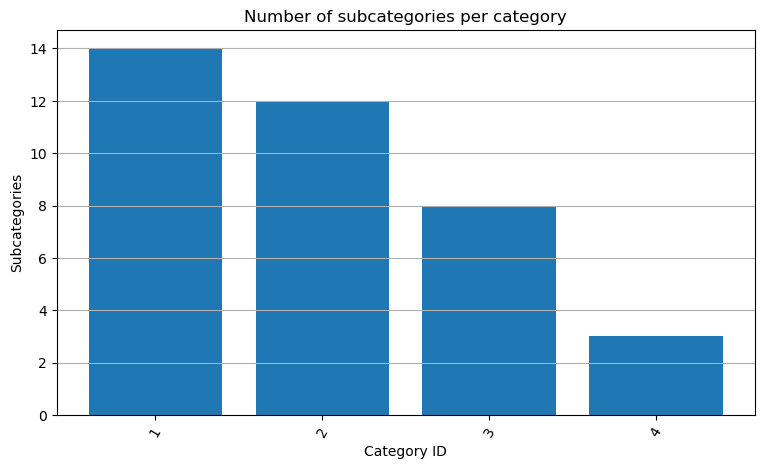

In [7]:
fig, ax = plt.subplots(figsize=(9, 5))
x = [int(k) for k in subcats_in_cat.keys()]
y = [len(v) for v in subcats_in_cat.values()]
y.sort(reverse=True)
ax.bar(x, y)
ax.set_title("Number of subcategories per category")
ax.set_xlabel("Category ID")
ax.set_ylabel("Subcategories")
ax.grid(axis = "y")
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xticks(rotation=60)
plt.show()

### Check how many products each subcategory has

In [8]:
products_per_subcat = {}

for i in productSubcategoryIDs:
    products_per_subcat[f"{i}"] = len(product_df[product_df["ProductSubcategoryID"] == i])
products_per_subcat["Null"] = product_df["ProductSubcategoryID"].isna().sum()

sorted_orders = dict(sorted(products_per_subcat.items(), key=lambda item: item[1], reverse=True))

print(products_per_subcat)

{'1': 32, '2': 43, '3': 22, '4': 8, '5': 3, '6': 2, '7': 1, '8': 3, '9': 2, '10': 3, '11': 3, '12': 28, '13': 7, '14': 33, '15': 9, '16': 18, '17': 14, '18': 3, '19': 1, '20': 6, '21': 8, '22': 7, '23': 4, '24': 3, '25': 3, '26': 1, '27': 1, '28': 3, '29': 1, '30': 1, '31': 3, '32': 1, '33': 3, '34': 1, '35': 1, '36': 2, '37': 11, 'Null': 209}


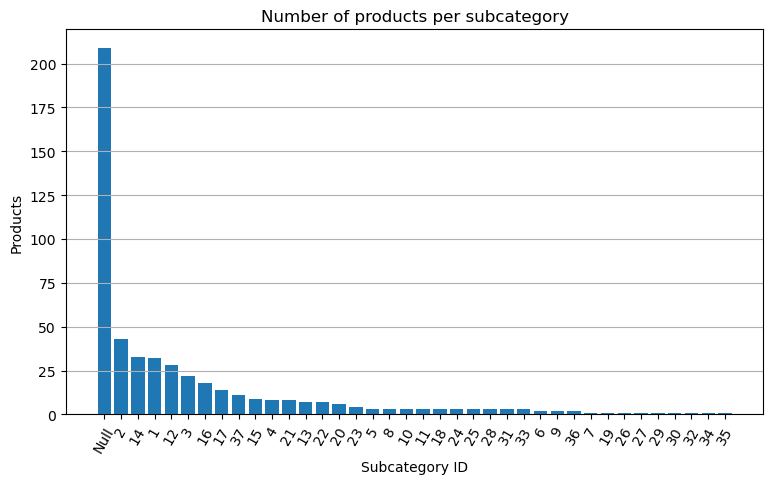

In [9]:
fig, ax = plt.subplots(figsize=(9, 5))
x = list(sorted_orders.keys())
y = list(sorted_orders.values())
ax.bar(x, y)
ax.set_title("Number of products per subcategory")
ax.set_xlabel("Subcategory ID")
ax.set_ylabel("Products")
ax.grid(axis = "y")
plt.xticks(rotation=60)
plt.show()

### Check how many products each category has

In [10]:
products_per_cat = {}

for i in subcats_in_cat:
    products_per_cat[str(i)] = 0
    for j in subcats_in_cat[i]:
        products_per_cat[str(i)] += products_per_subcat[str(j)]
products_per_cat["Null"] = product_df["ProductSubcategoryID"].isna().sum()

sorted_products = dict(sorted(products_per_cat.items(), key=lambda item: item[1], reverse=True))

print(products_per_cat)
#print(sorted_products)

{'1': 97, '2': 134, '3': 35, '4': 29, 'Null': 209}


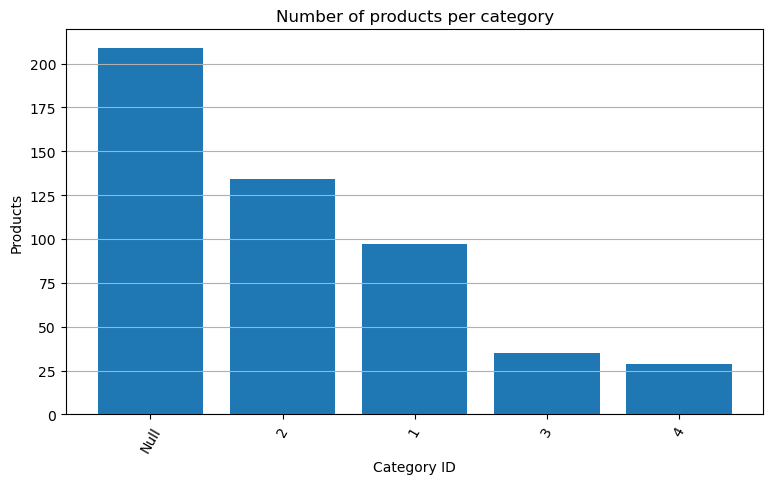

In [11]:
fig, ax = plt.subplots(figsize=(9, 5))
x = list(sorted_products.keys())
y = list(sorted_products.values())
ax.bar(x, y)
ax.set_title("Number of products per category")
ax.set_xlabel("Category ID")
ax.set_ylabel("Products")
ax.grid(axis = "y")
plt.xticks(rotation=60)
plt.show()

# Conclusion Task 1:
From the bar charts above, it is clear that the Null category and Null subcategory has the most products. But since it is Null, it may not be interesting at the moment. If it is disregarded for a while, ProductCategory 2 (Components) takes the lead.

* Category 1 has the most subcategories
* Subcategory 2 has the most products
* Category 2 has the most products in general

Category 4 (Accessories) has the least amount of products according to the charts

# Task 2 - Sales per Product Category